In [1]:
#Carga de librerias a usar
!pip install sweetviz
import pandas as pd
import sweetviz as sv
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

     |████████████████████████████████| 15.1 MB 7.2 MB/s 


In [30]:
#Importacion de Dataset
df_train = pd.read_csv("Hb_Niños_MOQUEGUA.csv", sep=",",encoding='latin-1')
df_train.head(5)

,Diresa,Red,Microred,EESS,Dpto_EESS,Prov_EESS,Dist_EESS,Renipress,FechaAtencion,Pais,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,Juntos,SIS,Pin,Qaliwarma,Peso,Talla,Hemoglobina,FechaHemoglobina,Cred,Suplementacion,Consejeria,Sesion,MES,UbigeoREN,DepartamentoREN,ProvinciaREN,DistritoREN,AlturaREN,HBC,Dx_Anemia
0,MOQUEGUA,ILO,ILO,I-2 - 00007731 - P.S. LOS ANGELES - ILO,MOQUEGUA,ILO,ILO,7731,01-jun-21,PER,M,01-nov-17,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.80,94.80,12.0,#NULL!,1,1,0,0,6,180301,MOQUEGUA,ILO,ILO,15,12.00,Normal
1,MOQUEGUA,MOQUEGUA,ICHUÑA,I-3 - 00002848 - C.S. ICHUÑA,MOQUEGUA,GENERAL SANCHEZ CERRO,ICHUÑA,2848,19-may-21,PER,M,17-may-20,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.20,77.30,15.4,#NULL!,1,1,1,0,5,180204,MOQUEGUA,GENERAL SANCHEZ CERRO,ICHUÑA,3756,12.42,Normal
2,MOQUEGUA,ILO,ILO,I-2 - 00007731 - P.S. LOS ANGELES - ILO,MOQUEGUA,ILO,ILO,7731,13-feb-21,PER,F,13-ago-20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,66.10,10.4,#NULL!,1,1,0,0,2,180301,MOQUEGUA,ILO,ILO,15,10.40,Anemia Leve
3,MOQUEGUA,ILO,ILO,I-3 - 00002820 - C.S. PAMPA INALAMBRICA,MOQUEGUA,ILO,ILO,2820,05-abr-21,PER,M,02-abr-19,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.11,85.50,11.2,#NULL!,1,0,0,0,4,180301,MOQUEGUA,ILO,ILO,15,11.20,Normal
4,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-2 - 00002828 - P.S. EL SIGLO,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,2828,09-feb-21,PER,F,22-ene-20,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.30,73.00,11.5,#NULL!,1,1,1,0,2,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,11.17,Normal


In [29]:
df_train.head(50)

,Diresa,Red,Microred,EESS,Dpto_EESS,Prov_EESS,Dist_EESS,Renipress,FechaAtencion,Pais,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,Juntos,SIS,Pin,Qaliwarma,Peso,Talla,Hemoglobina,FechaHemoglobina,Cred,Suplementacion,Consejeria,Sesion,MES,UbigeoREN,DepartamentoREN,ProvinciaREN,DistritoREN,AlturaREN,HBC,Dx_Anemia
0,MOQUEGUA,ILO,ILO,I-2 - 00007731 - P.S. LOS ANGELES - ILO,MOQUEGUA,ILO,ILO,7731,01-jun-21,PER,M,01-nov-17,43,,,,,,,,,,14.80,94.80,12.0,#NULL!,1,1,0,0,6,180301,MOQUEGUA,ILO,ILO,15,12.00,Normal
1,MOQUEGUA,MOQUEGUA,ICHUÑA,I-3 - 00002848 - C.S. ICHUÑA,MOQUEGUA,GENERAL SANCHEZ CERRO,ICHUÑA,2848,19-may-21,PER,M,17-may-20,12,,,,,,,,,,11.20,77.30,15.4,#NULL!,1,1,1,0,5,180204,MOQUEGUA,GENERAL SANCHEZ CERRO,ICHUÑA,3756,12.42,Normal
2,MOQUEGUA,ILO,ILO,I-2 - 00007731 - P.S. LOS ANGELES - ILO,MOQUEGUA,ILO,ILO,7731,13-feb-21,PER,F,13-ago-20,6,,,,,,,,,,8.00,66.10,10.4,#NULL!,1,1,0,0,2,180301,MOQUEGUA,ILO,ILO,15,10.40,Anemia Leve
3,MOQUEGUA,ILO,ILO,I-3 - 00002820 - C.S. PAMPA INALAMBRICA,MOQUEGUA,ILO,ILO,2820,05-abr-21,PER,M,02-abr-19,24,,,,,,,,,,12.11,85.50,11.2,#NULL!,1,0,0,0,4,180301,MOQUEGUA,ILO,ILO,15,11.20,Normal
4,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-2 - 00002828 - P.S. EL SIGLO,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,2828,09-feb-21,PER,F,22-ene-20,13,,,,,,,,,,8.30,73.00,11.5,#NULL!,1,1,1,0,2,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,11.17,Normal
5,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-2 - 00002828 - P.S. EL SIGLO,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,2828,22-abr-21,PER,M,10-sep-16,55,,,,,,,,,,15.50,106.00,12.7,#NULL!,1,1,0,0,4,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,12.37,Normal
6,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-3 - 00026120 - C.S. MERCADO CENTRAL,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,26120,24-jun-21,PER,M,01-abr-20,14,,,,,,,,,,11.10,79.50,10.0,#NULL!,1,0,1,0,6,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,9.67,Anemia Moderada
7,MOQUEGUA,MOQUEGUA,OMATE,I-3 - 00002841 - CENTRO DE SALUD OMATE,MOQUEGUA,GENERAL SANCHEZ CERRO,OMATE,2841,25-abr-21,PER,F,22-abr-20,12,,,,,,,,,,10.00,74.10,11.0,#NULL!,1,1,0,0,4,180201,MOQUEGUA,GENERAL SANCHEZ CERRO,OMATE,2166,10.10,Anemia Leve
8,MOQUEGUA,MOQUEGUA,OMATE,I-1 - 00002842 - P.S. CHALLAGUAYO,MOQUEGUA,GENERAL SANCHEZ CERRO,OMATE,2842,31-may-21,PER,M,27-may-20,12,,,,,,,,,,9.60,0.74,12.3,30-may-21,1,1,1,0,5,180201,MOQUEGUA,GENERAL SANCHEZ CERRO,OMATE,2166,11.40,Normal
9,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-1 - 00002835 - P.S. YACANGO,MOQUEGUA,MARISCAL NIETO,TORATA,2835,14-ene-21,PER,F,29-jun-20,7,,,,,,,,,,,,12.7,14-ene-21,0,0,0,0,1,180106,MOQUEGUA,MARISCAL NIETO,TORATA,2207,11.77,Normal


In [31]:
#Cantidad de registros y columnas en el dataset
print('Cantidad de datos:')
print('Registros, Columnas')
print(df_train.shape)

Cantidad de datos:
Registros, Columnas
(1873, 38)


In [32]:
#Obtenemos el tipo de dato de cada columna en el dataset
print('Tipos de datos:')
print(df_train.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diresa            1873 non-null   object 
 1   Red               1873 non-null   object 
 2   Microred          1873 non-null   object 
 3   EESS              1873 non-null   object 
 4   Dpto_EESS         1873 non-null   object 
 5   Prov_EESS         1873 non-null   object 
 6   Dist_EESS         1873 non-null   object 
 7   Renipress         1873 non-null   int64  
 8   FechaAtencion     1873 non-null   object 
 9   Pais              1873 non-null   object 
 10  Sexo              1873 non-null   object 
 11  FechaNacimiento   1873 non-null   object 
 12  EdadMeses         1873 non-null   int64  
 13  UbigeoPN          1669 non-null   float64
 14  DepartamentoPN    1669 non-null   object 
 15  ProvinciaPN       1669 non-null   object 
 16  DistritoPN        1669 non

In [34]:
# df_train.replace('#¡NULO!', pd.NA)
# df_train.replace('#NULL!', pd.NA)

# df_train = df_train[df_train['Peso'] != "#¡NULO!"]
# df_train = df_train[df_train['Talla'] != "#¡NULO!"]

df_train = df_train.replace("#¡NULO!", Null, regex=True) # All data frame
df_train.fillna(Null, inplace=True)

In [35]:
df_train

,Diresa,Red,Microred,EESS,Dpto_EESS,Prov_EESS,Dist_EESS,Renipress,FechaAtencion,Pais,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,Juntos,SIS,Pin,Qaliwarma,Peso,Talla,Hemoglobina,FechaHemoglobina,Cred,Suplementacion,Consejeria,Sesion,MES,UbigeoREN,DepartamentoREN,ProvinciaREN,DistritoREN,AlturaREN,HBC,Dx_Anemia
0,MOQUEGUA,ILO,ILO,I-2 - 00007731 - P.S. LOS ANGELES - ILO,MOQUEGUA,ILO,ILO,7731,01-jun-21,PER,M,01-nov-17,43,Null,Null,Null,Null,Null,Null,Null,Null,Null,14.80,94.80,12.0,#NULL!,1,1,0,0,6,180301,MOQUEGUA,ILO,ILO,15,12.00,Normal
1,MOQUEGUA,MOQUEGUA,ICHUÑA,I-3 - 00002848 - C.S. ICHUÑA,MOQUEGUA,GENERAL SANCHEZ CERRO,ICHUÑA,2848,19-may-21,PER,M,17-may-20,12,Null,Null,Null,Null,Null,Null,Null,Null,Null,11.20,77.30,15.4,#NULL!,1,1,1,0,5,180204,MOQUEGUA,GENERAL SANCHEZ CERRO,ICHUÑA,3756,12.42,Normal
2,MOQUEGUA,ILO,ILO,I-2 - 00007731 - P.S. LOS ANGELES - ILO,MOQUEGUA,ILO,ILO,7731,13-feb-21,PER,F,13-ago-20,6,Null,Null,Null,Null,Null,Null,Null,Null,Null,8.00,66.10,10.4,#NULL!,1,1,0,0,2,180301,MOQUEGUA,ILO,ILO,15,10.40,Anemia Leve
3,MOQUEGUA,ILO,ILO,I-3 - 00002820 - C.S. PAMPA INALAMBRICA,MOQUEGUA,ILO,ILO,2820,05-abr-21,PER,M,02-abr-19,24,Null,Null,Null,Null,Null,Null,Null,Null,Null,12.11,85.50,11.2,#NULL!,1,0,0,0,4,180301,MOQUEGUA,ILO,ILO,15,11.20,Normal
4,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-2 - 00002828 - P.S. EL SIGLO,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,2828,09-feb-21,PER,F,22-ene-20,13,Null,Null,Null,Null,Null,Null,Null,Null,Null,8.30,73.00,11.5,#NULL!,1,1,1,0,2,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,11.17,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-3 - 00002830 - C.S. SAN ANTONIO,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,2830,02-feb-21,PER,F,15-ene-17,49,Null,Null,Null,Null,Null,Null,Null,Null,Null,16.60,103.00,12.4,#NULL!,1,1,0,0,2,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,12.07,Normal
1869,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-3 - 00002825 - C.S. MARISCAL NIETO,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,2825,09-mar-21,PER,M,29-ago-19,19,Null,Null,Null,Null,Null,Null,Null,Null,Null,11.38,79.20,9.4,#NULL!,1,0,1,0,3,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,9.07,Anemia Moderada
1870,MOQUEGUA,ILO,ILO,I-3 - 00002820 - C.S. PAMPA INALAMBRICA,MOQUEGUA,ILO,ILO,2820,29-mar-21,PER,M,10-sep-19,18,Null,Null,Null,Null,Null,Null,Null,Null,Null,11.80,82.40,12.7,#NULL!,1,1,1,0,3,180301,MOQUEGUA,ILO,ILO,15,12.70,Normal
1871,MOQUEGUA,ILO,ILO,I-3 - 00002820 - C.S. PAMPA INALAMBRICA,MOQUEGUA,ILO,ILO,2820,24-abr-21,PER,M,30-sep-17,43,Null,Null,Null,Null,Null,Null,Null,Null,Null,14.10,95.20,14.0,#NULL!,1,0,0,0,4,180301,MOQUEGUA,ILO,ILO,15,14.00,Normal


In [36]:
#cambiamos los tipos de datos en columnas no clasificadas correctamente
#se encuentra que en el dataset hay campos con el valor #¡NULO!
df_train['Peso'] = df_train['Peso'].astype('float64')
df_train['Talla'] = df_train['Talla'].astype('float64')

ValueError: ignored

In [10]:
#eliminamos multiples columnas que no necesitamos
df_train = df_train.drop(['Red','Microred','EESS','Dpto_EESS','Prov_EESS','Dist_EESS','Renipress','FechaAtencion','CentroPobladoPN','Juntos','SIS','Pin','Qaliwarma','Cred','Suplementacion','Consejeria','Sesion','MES','UbigeoREN'], axis=1)

In [11]:
#Verifico los datos faltantes del dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum())

Datos faltantes:
Diresa                0
Pais                  0
Sexo                  0
FechaNacimiento       0
EdadMeses             0
UbigeoPN            191
DepartamentoPN      191
ProvinciaPN         191
DistritoPN          191
Peso                  0
Talla                 0
Hemoglobina           0
FechaHemoglobina      0
DepartamentoREN       0
ProvinciaREN          0
DistritoREN           0
AlturaREN             0
HBC                   0
Dx_Anemia             0
dtype: int64


In [18]:
#Ratio de variables nulas
nulos_ratio = ((df_train.isnull().sum() / len(df_train))*100)
print(nulos_ratio)

Diresa               0.000000
Pais                 0.000000
Sexo                 0.000000
FechaNacimiento      0.000000
EdadMeses            0.000000
UbigeoPN            13.217993
DepartamentoPN      13.217993
ProvinciaPN         13.217993
DistritoPN          13.217993
Peso                 0.000000
Talla                0.000000
Hemoglobina          0.000000
FechaHemoglobina     0.000000
DepartamentoREN      0.000000
ProvinciaREN         0.000000
DistritoREN          0.000000
AlturaREN            0.000000
HBC                  0.000000
Dx_Anemia            0.000000
Dx_Anemia_T          0.000000
dtype: float64


In [26]:
#usamos SWEETVIZ para obtener una analisis previo
my_report = sv.analyze(df_train)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


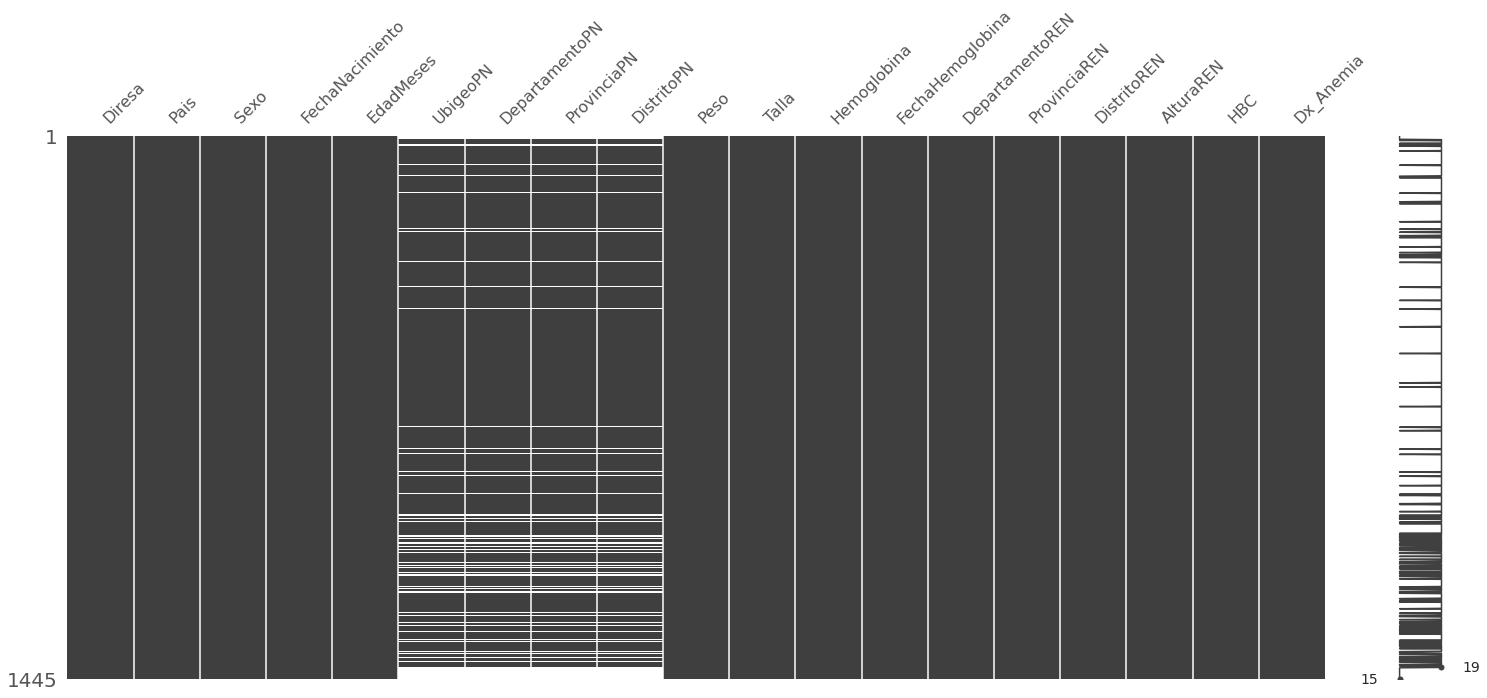

In [13]:
#visualizamos datos faltantes
msno.matrix(df_train)

Definimos nuestra variable target

In [14]:
def crear_codigo_target(fila):
    Dx = fila
    if Dx == 'Normal':
      return 0
    else:
      return 1

df_train['Dx_Anemia_T'] = df_train['Dx_Anemia'].apply(crear_codigo_target)
df_train


,Diresa,Pais,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,DepartamentoPN,ProvinciaPN,DistritoPN,Peso,Talla,Hemoglobina,FechaHemoglobina,DepartamentoREN,ProvinciaREN,DistritoREN,AlturaREN,HBC,Dx_Anemia,Dx_Anemia_T
0,MOQUEGUA,PER,M,01-nov-17,43,NaN,NaN,NaN,NaN,14.80,94.8,12.0,#NULL!,MOQUEGUA,ILO,ILO,15,12.00,Normal,0
1,MOQUEGUA,PER,M,17-may-20,12,NaN,NaN,NaN,NaN,11.20,77.3,15.4,#NULL!,MOQUEGUA,GENERAL SANCHEZ CERRO,ICHUÑA,3756,12.42,Normal,0
2,MOQUEGUA,PER,F,13-ago-20,6,NaN,NaN,NaN,NaN,8.00,66.1,10.4,#NULL!,MOQUEGUA,ILO,ILO,15,10.40,Anemia Leve,1
3,MOQUEGUA,PER,M,02-abr-19,24,NaN,NaN,NaN,NaN,12.11,85.5,11.2,#NULL!,MOQUEGUA,ILO,ILO,15,11.20,Normal,0
4,MOQUEGUA,PER,F,22-ene-20,13,NaN,NaN,NaN,NaN,8.30,73.0,11.5,#NULL!,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,11.17,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,MOQUEGUA,PER,F,15-ene-17,49,NaN,NaN,NaN,NaN,16.60,103.0,12.4,#NULL!,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,12.07,Normal,0
1869,MOQUEGUA,PER,M,29-ago-19,19,NaN,NaN,NaN,NaN,11.38,79.2,9.4,#NULL!,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410,9.07,Anemia Moderada,1
1870,MOQUEGUA,PER,M,10-sep-19,18,NaN,NaN,NaN,NaN,11.80,82.4,12.7,#NULL!,MOQUEGUA,ILO,ILO,15,12.70,Normal,0
1871,MOQUEGUA,PER,M,30-sep-17,43,NaN,NaN,NaN,NaN,14.10,95.2,14.0,#NULL!,MOQUEGUA,ILO,ILO,15,14.00,Normal,0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    0.832526
1    0.167474
Name: Dx_Anemia_T, dtype: float64

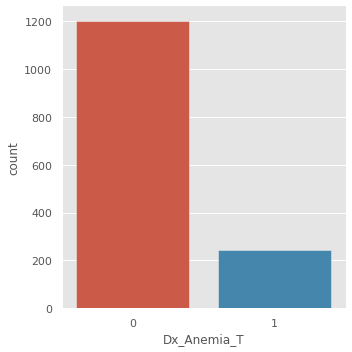

In [15]:
sns.factorplot('Dx_Anemia_T',data=df_train,kind="count")
df_train['Dx_Anemia_T'].value_counts(1).sort_index()

In [16]:
print('Estadísticas del dataset:')
df_train.describe()

Estadísticas del dataset:


,EdadMeses,UbigeoPN,Peso,Talla,Hemoglobina,AlturaREN,HBC,Dx_Anemia_T
count,1445.000000,1254.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,25.033910,175608.877193,13.488166,85.415875,12.043024,1000.883045,11.725557,0.167474
std,15.270627,27984.870957,9.140798,30.782062,1.172099,871.788719,1.074180,0.373528
min,6.000000,30505.000000,1.100000,0.660000,7.100000,5.000000,7.100000,0.000000
25%,12.000000,180101.000000,9.900000,75.000000,11.400000,15.000000,11.100000,0.000000
50%,21.000000,180104.000000,12.100000,83.500000,12.000000,1410.000000,11.670000,0.000000
75%,36.000000,180301.000000,15.200000,94.600000,12.700000,1410.000000,12.400000,0.000000
max,60.000000,250303.000000,144.000000,994.000000,18.100000,3756.000000,17.770000,1.000000


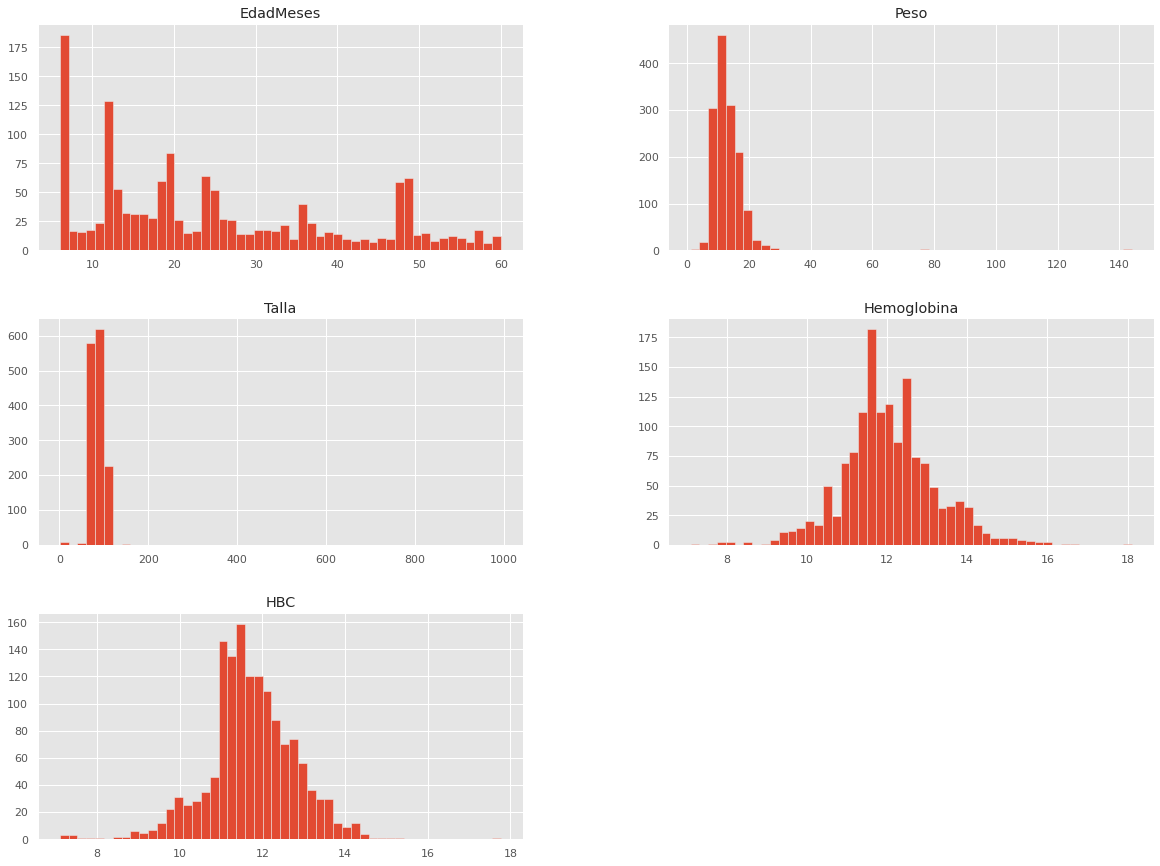

In [17]:
#Valores atípicos
Variables = ['EdadMeses','Peso','Talla','Hemoglobina','HBC']
df_train[Variables].hist(bins = 50, figsize=(20,15))
plt.show()